<a href="https://colab.research.google.com/github/audalsgh/20250728/blob/main/0728_Transfer_Learning_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 코랩과 구글 드라이브 연동, mount해오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 드라이브의 파일을 코랩으로 복사, zip파일대신 통째로 집어넣었어서, 디렉터리 복사인 -r 옵션을 주었다.
!cp -r "/content/drive/MyDrive/dataset" "/content/"

# 압축 해제 확인
!ls -la /content/

total 24
drwxr-xr-x 1 root root 4096 Jul 28 00:36 .
drwxr-xr-x 1 root root 4096 Jul 28 00:31 ..
drwxr-xr-x 4 root root 4096 Jul 24 13:37 .config
drwx------ 3 root root 4096 Jul 28 00:36 dataset
drwx------ 5 root root 4096 Jul 28 00:36 drive
drwxr-xr-x 1 root root 4096 Jul 24 13:37 sample_data


In [9]:
# 1. ultralytics 설치
!pip install ultralytics

# 2. 설치 확인 후 다시 실행
from ultralytics import YOLO
import glob
import os

print("✅ ultralytics 설치 완료!")

# 이미 학습된, 내가 업로드한 모델 사용
model = YOLO('/content/dataset/dataset/best.pt')

# YouTube 영상 다운로드
!pip install yt-dlp
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

✅ ultralytics 설치 완료!
[youtube] Extracting URL: https://www.youtube.com/watch?v=AxLmroTo3rQ
[youtube] AxLmroTo3rQ: Downloading webpage
[youtube] AxLmroTo3rQ: Downloading tv client config
[youtube] AxLmroTo3rQ: Downloading tv player API JSON
[youtube] AxLmroTo3rQ: Downloading ios player API JSON
[youtube] AxLmroTo3rQ: Downloading m3u8 information
[info] AxLmroTo3rQ: Downloading 1 format(s): 18
[download] /content/test_video.mp4 has already been downloaded
[download] 100% of    7.14MiB


📹 다운로드된 영상: /content/test_video.mp4

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/3990) /content/test_video.mp4: 384x640 3 traffic_signs, 11.6ms
video 1/1 (frame 2/3990) /content/test_video.mp4: 384x640 5 traffic_signs, 6.9ms
video 1/1 (frame 3/3990) /content/test_video.mp4: 384x640 4 traffic_signs, 6.4ms
video 1/1 (frame 4/3990) /content/test_video.mp4: 384x640 3 traffic_signs, 9.3ms
video 1/1 (frame 5/3990) /content/test_video.mp4: 384x640 4 traffic_signs, 7.1ms
video 1/1 (fra

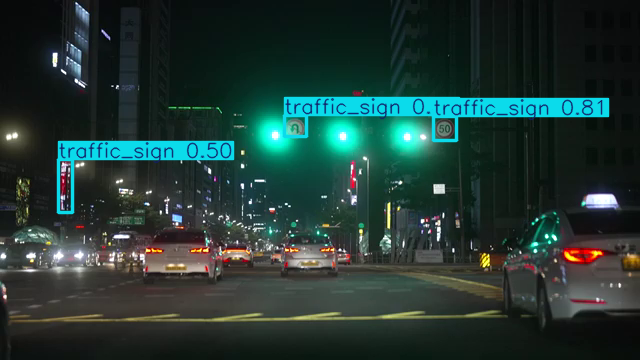


📊 모델 성능 평가:
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2296.0±537.9 MB/s, size: 289.0 KB)


val: Scanning /content/dataset/dataset/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


                   all         72        569      0.614      0.486      0.478      0.192
                  lane         72        497      0.529      0.416      0.433      0.142
          traffic_sign         34         72      0.699      0.556      0.523      0.243
Speed: 2.9ms preprocess, 4.1ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val4
mAP50: 0.4781
mAP50-95: 0.1924
Precision: 0.6142
Recall: 0.4860

✅ 모든 작업 완료!


In [8]:
import time

# 다운로드된 파일 찾기 (확장자가 다를 수 있음)
video_files = glob.glob('/content/test_video.*')
if video_files:
    video_path = video_files[0]
    print(f"📹 다운로드된 영상: {video_path}")

    # 추론 실행 전 시간 측정 시작
    start_time = time.time()

    # 추론 실행
    results = model(video_path)

    # 시간 측정 종료
    end_time = time.time()
    elapsed = end_time - start_time
    frame_count = len(results)
    fps = frame_count / elapsed if elapsed > 0 else 0

    print(f"\n⚡ YOLO 추론 FPS: {fps:.2f} (처리 시간: {elapsed:.2f}초, 프레임 수: {frame_count})")

    # 결과 표시 (영상의 경우 첫 번째 프레임만)
    if results:
        results[0].show()
else:
    print("❌ 영상 다운로드 실패")

# 기존 검증 데이터로 성능 측정
print("\n📊 모델 성능 평가:")
metrics = model.val(data='/content/dataset/dataset/dataset.yaml')
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")

print("\n✅ 모든 작업 완료!")

In [6]:
# 1. dataset.yaml 파일 내용 확인
print("📋 dataset.yaml 파일 내용:")
with open('/content/dataset/dataset/dataset.yaml', 'r') as f:
    yaml_content = f.read()
    print(yaml_content)

📋 dataset.yaml 파일 내용:

path: /content/dataset
train: /content/dataset/dataset/train
val: /content/dataset/dataset/valid
names:
  0: lane
  1: traffic_sign



[youtube] Extracting URL: https://www.youtube.com/watch?v=AxLmroTo3rQ
[youtube] AxLmroTo3rQ: Downloading webpage
[youtube] AxLmroTo3rQ: Downloading tv client config
[youtube] AxLmroTo3rQ: Downloading tv player API JSON
[youtube] AxLmroTo3rQ: Downloading ios player API JSON
[youtube] AxLmroTo3rQ: Downloading m3u8 information
[info] AxLmroTo3rQ: Downloading 1 format(s): 18
[download] /content/test_video.mp4 has already been downloaded
[download] 100% of    7.14MiB

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classificatio

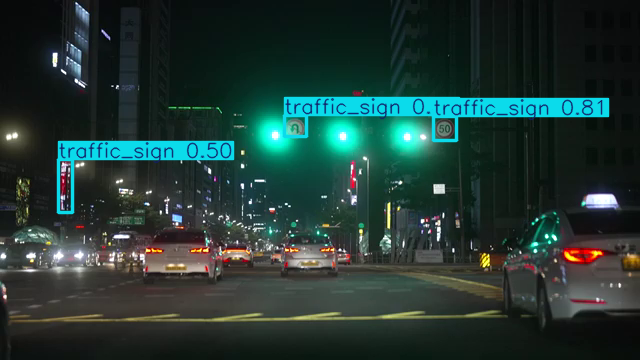

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2585.1±510.1 MB/s, size: 315.3 KB)


val: Scanning /content/dataset/dataset/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]


                   all         72        569      0.614      0.486      0.478      0.192
                  lane         72        497      0.529      0.416      0.433      0.142
          traffic_sign         34         72      0.699      0.556      0.523      0.243
Speed: 4.0ms preprocess, 5.0ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val3
mAP50: 0.4781


In [7]:
!pip install ultralytics yt-dlp

from ultralytics import YOLO
import glob

# yaml 수정 (핵심 문제 해결)
yaml_fix = '''path: /content/dataset/dataset
train: train/images
val: valid/images
names:
  0: lane
  1: traffic_sign
nc: 2'''

with open('/content/dataset/dataset/dataset_fixed.yaml', 'w') as f:
    f.write(yaml_fix)

# 모델 로드 & 영상 다운로드 & 추론
model = YOLO('/content/dataset/dataset/best.pt')
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

video_path = glob.glob('/content/test_video.*')[0]
results = model(video_path)
results[0].show()

# 성능 평가
metrics = model.val(data='/content/dataset/dataset/dataset_fixed.yaml')
print(f"mAP50: {metrics.box.map50:.4f}")

  Using cached onnx-1.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.9 kB)
Using cached onnx-1.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: onnx
    Found existing installation: onnx 1.17.0
    Uninstalling onnx-1.17.0:
      Successfully uninstalled onnx-1.17.0
✅ ultralytics 설치 완료!
WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.7.1+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/dataset/dataset/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0,<1.18.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onn

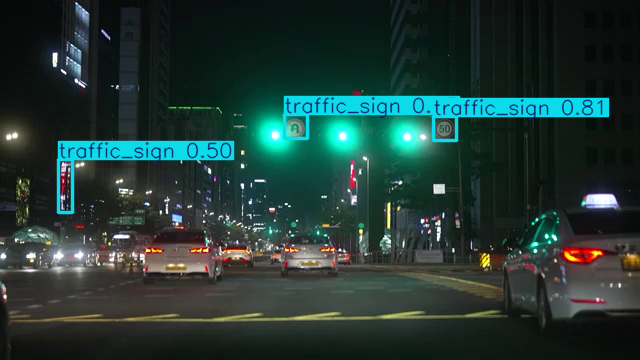


📊 모델 성능 평가는 텐서RT는 불가능. model.val() 함수가 존재하지 않음

✅ 모든 작업 완료!


In [2]:
# 1. ultralytics, tensorRT 설치
!pip install -U ultralytics onnx onnxruntime-gpu onnxsim onnxslim tensorrt

# 2. 설치 확인 후 다시 실행
from ultralytics import YOLO
import glob
import os
import time

print("✅ ultralytics 설치 완료!")

# ✅ TensorRT 최적화 모델 로드하기 (변환된 .engine 파일이 필요함.)
# Ultralytics YOLOv8/v11 모델 .pt파일을 TensorRT용으로 export하려면 별도 변환을 해줘야함.
# TensorRT 엔진으로 내보내는 export문장 1줄 추가 (best.engine 파일이 생성됨!)
!yolo export model=/content/dataset/dataset/best.pt format=engine

model = YOLO('/content/dataset/dataset/best.engine')  # 또는 best_trt.pt (TensorRT 내장됨)

# YouTube 영상 다운로드
!pip install yt-dlp
!yt-dlp -f 'best[height<=720]' -o '/content/test_video.%(ext)s' 'https://www.youtube.com/watch?v=AxLmroTo3rQ'

# 다운로드된 파일 찾기 (확장자가 다를 수 있음)
video_files = glob.glob('/content/test_video.*')
if video_files:
    video_path = video_files[0]
    print(f"📹 다운로드된 영상: {video_path}")

    # 추론 실행 전 시간 측정 시작
    start_time = time.time()

    # ✅ TensorRT 모델로 추론
    results = model.predict(
        source=video_path,
        save=False,
        conf=0.3,
        vid_stride=1
    )

    # 시간 측정 종료
    end_time = time.time()
    elapsed = end_time - start_time
    frame_count = len(results)
    fps = frame_count / elapsed if elapsed > 0 else 0

    print(f"\n⚡ YOLO (TensorRT) 추론 FPS: {fps:.2f} (처리 시간: {elapsed:.2f}초, 프레임 수: {frame_count})")

    # 결과 표시 (영상의 경우 첫 번째 프레임만)
    if results:
        results[0].show()
else:
    print("❌ 영상 다운로드 실패")

# 기존 검증 데이터로 성능 측정
print("\n📊 모델 성능 평가는 텐서RT는 불가능. model.val() 함수가 존재하지 않음")

print("\n✅ 모든 작업 완료!")